(traditional)=
# Traditional
 
<div style="display: flex; justify-content: center;">
    <iframe width="80%" height="400px" src="https://www.youtube.com/embed/8bVaNbW8VMw?start=329" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

```{figure} https://www.ledr.com/colours/white.jpg
---
width: 1
height: 1
---
I'd advise you to consider your position carefully (layer 3 fork in the road), perhaps adopting a more flexible posture (layer 4 dynamic capabilities realized), while keeping your ear to the ground (layer 2 yellow node), covering your retreat (layer 5 Athena's shield, helmet, and horse), and watching your rear (layer 1 ecosystem and perspective).
```
 

 



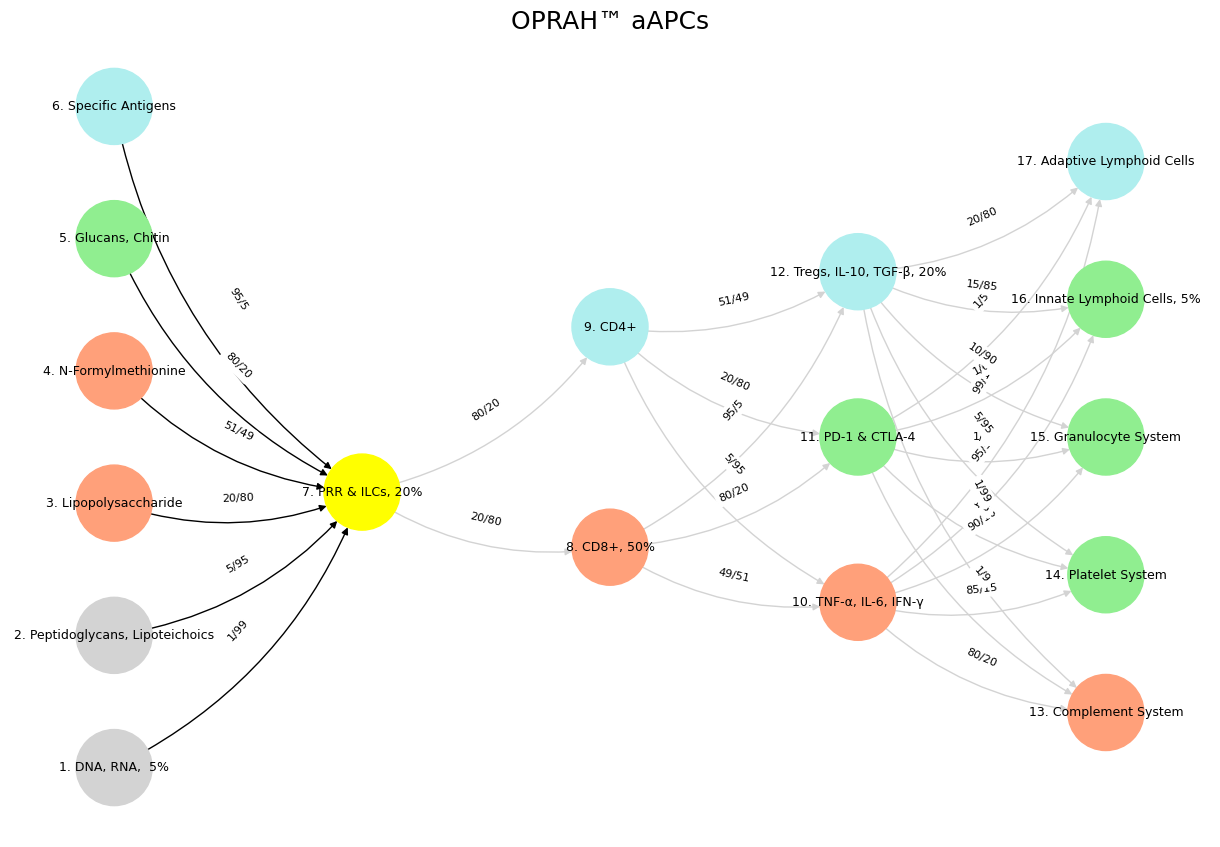

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers
def define_layers():
    return {
        'Suis': ['DNA, RNA,  5%', 'Peptidoglycans, Lipoteichoics', 'Lipopolysaccharide', 'N-Formylmethionine', "Glucans, Chitin", 'Specific Antigens'],
        'Voir': ['PRR & ILCs, 20%'],  
        'Choisis': ['CD8+, 50%', 'CD4+'],  
        'Deviens': ['TNF-α, IL-6, IFN-γ', 'PD-1 & CTLA-4', 'Tregs, IL-10, TGF-β, 20%'],  
        "M'èléve": ['Complement System', 'Platelet System', 'Granulocyte System', 'Innate Lymphoid Cells, 5%', 'Adaptive Lymphoid Cells']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['PRR & ILCs, 20%'],  
        'paleturquoise': ['Specific Antigens', 'CD4+', 'Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'],  
        'lightgreen': ["Glucans, Chitin", 'PD-1 & CTLA-4', 'Platelet System', 'Innate Lymphoid Cells, 5%', 'Granulocyte System'],  
        'lightsalmon': ['Lipopolysaccharide', 'N-Formylmethionine', 'CD8+, 50%', 'TNF-α, IL-6, IFN-γ', 'Complement System'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('DNA, RNA,  5%', 'PRR & ILCs, 20%'): '1/99',
        ('Peptidoglycans, Lipoteichoics', 'PRR & ILCs, 20%'): '5/95',
        ('Lipopolysaccharide', 'PRR & ILCs, 20%'): '20/80',
        ('N-Formylmethionine', 'PRR & ILCs, 20%'): '51/49',
        ("Glucans, Chitin", 'PRR & ILCs, 20%'): '80/20',
        ('Specific Antigens', 'PRR & ILCs, 20%'): '95/5',
        ('PRR & ILCs, 20%', 'CD8+, 50%'): '20/80',
        ('PRR & ILCs, 20%', 'CD4+'): '80/20',
        ('CD8+, 50%', 'TNF-α, IL-6, IFN-γ'): '49/51',
        ('CD8+, 50%', 'PD-1 & CTLA-4'): '80/20',
        ('CD8+, 50%', 'Tregs, IL-10, TGF-β, 20%'): '95/5',
        ('CD4+', 'TNF-α, IL-6, IFN-γ'): '5/95',
        ('CD4+', 'PD-1 & CTLA-4'): '20/80',
        ('CD4+', 'Tregs, IL-10, TGF-β, 20%'): '51/49',
        ('TNF-α, IL-6, IFN-γ', 'Complement System'): '80/20',
        ('TNF-α, IL-6, IFN-γ', 'Platelet System'): '85/15',
        ('TNF-α, IL-6, IFN-γ', 'Granulocyte System'): '90/10',
        ('TNF-α, IL-6, IFN-γ', 'Innate Lymphoid Cells, 5%'): '95/5',
        ('TNF-α, IL-6, IFN-γ', 'Adaptive Lymphoid Cells'): '99/1',
        ('PD-1 & CTLA-4', 'Complement System'): '1/9',
        ('PD-1 & CTLA-4', 'Platelet System'): '1/8',
        ('PD-1 & CTLA-4', 'Granulocyte System'): '1/7',
        ('PD-1 & CTLA-4', 'Innate Lymphoid Cells, 5%'): '1/6',
        ('PD-1 & CTLA-4', 'Adaptive Lymphoid Cells'): '1/5',
        ('Tregs, IL-10, TGF-β, 20%', 'Complement System'): '1/99',
        ('Tregs, IL-10, TGF-β, 20%', 'Platelet System'): '5/95',
        ('Tregs, IL-10, TGF-β, 20%', 'Granulocyte System'): '10/90',
        ('Tregs, IL-10, TGF-β, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('DNA, RNA,  5%', 'PRR & ILCs, 20%'): '1/99',
        ('Peptidoglycans, Lipoteichoics', 'PRR & ILCs, 20%'): '5/95',
        ('Lipopolysaccharide', 'PRR & ILCs, 20%'): '20/80',
        ('N-Formylmethionine', 'PRR & ILCs, 20%'): '51/49',
        ("Glucans, Chitin", 'PRR & ILCs, 20%'): '80/20',
        ('Specific Antigens', 'PRR & ILCs, 20%'): '95/5',
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™ aAPCs", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1 
height: 1
---
While neural biology inspired neural networks in machine learning, the realization that scaling laws apply so beautifully to machine learning has led to a divergence in the process of generation of intelligence. Biology is constrained by the Red Queen, whereas mankind is quite open to destroying the Ecosystem-Cost function for the sake of generating the most powerful AI.
```

 
